- Most Dangerous places
- Those sharks attack more at night?
- Rate of fatality by provoked/unprovoked
- Shark attacks after the realise of JAW movie 

In [1]:
import pandas as pd
import numpy as np
import regex 
import re
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Case Number                  0
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2830
Injury                      28
Fatal (Y/N)                539
Time                      3353
Species                   2837
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

## NA-s

## Clean empty columns and empty rows

In [2]:
df = pd.read_csv("/Users/leonplaza/Desktop/ironhack/projects/data/attacks.csv", encoding="latin_1")

# There are empty columns
df = df.drop(["Unnamed: 22", "Unnamed: 23"], axis=1)

# Clean the columns's names
df.columns = [x.strip() for x in df.columns]

# Lets identify cases with no information before removing
null_list1 = []
for i in range(df.shape[0]):
    if df.iloc[i,1:].isna().sum() == len(df.columns)-1:
        null_list1.append(i)
        
df = df.drop(index=null_list1, axis=0)

# Lets identify cases with no information before removing
null_list2 = []
for i in range(df.shape[0]):
    if df.iloc[i,:].isna().sum() == (len(df.columns)-2):
        null_list2.append(i)
        
df = df.drop(index=null_list2, axis=0)

# NaN Case
df.drop((df[df["Case Number"].isna()]).index, inplace=True)
df.reset_index(drop=True, inplace=True)

# Parse Dates

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href',
 'Case Number.1',
 'Case Number.2',
 'original order']

### Date cleaning for column Case Number

In [3]:
## xxxx-xx.xx a xxxx.xx.xx

for i in range(len(df)):
    if bool(re.search(r"\d{4}[.-]\d{2}[.-]\d{2}",df["Case Number"][i])):
        df["Case Number"][i] = re.sub(r"-", ".", df["Case Number"][i])
    

    
## all into xxxx.xx.xx with no additional strings
for i in range(len(df)):
    if bool(re.search(r"\d{4}[.-]\d{2}[.-]\d{2}",df["Case Number"][i])):
        df["Case Number"][i] = re.search(r"\d{4}[.-]\d{2}[.-]\d{2}",df["Case Number"][i]).group()
        
        
        
## xxxx.xx.00
for i in range(len(df)):
    if bool(re.search(r"\d{4}[.-](([0-9][1-9])|[1-9][0-9])[.-]00",df["Case Number"][i])):
        df["Case Number"][i] = re.sub(r"\b00(?!0)\b", "01", df["Case Number"][i])

        
## xxxx.xxxx    
for i in range(len(df)):
    if bool(re.search(r"\d{4}[.-]\d{4}",df["Case Number"][i])):
        df["Case Number"][i] = re.sub(r"(\d{4})\.(\d{2})(\d{2})", r"\1.\2.\3", df["Case Number"][i])

### Parse the data

In [4]:
## Date parsable
unparsable_index = []
unparsable_bool = []
for i in range(len(df)):
    try: 
        df["Date"][i] = datetime.strptime((df["Date"][i]), "%d-%b-%Y")
        unparsable_bool.append(False)
    except:
        unparsable_index.append(i)
        unparsable_bool.append(True)
        
## If date cant be parsed, we pass the value of Case Number

cleaned_index = []
uncleanable_index = []
bolean_v = []
bolean_f = []

for i in range(len(df)):
    try: 
        df["Case Number"][i] = datetime.strptime(str(df["Case Number"][i]), "%Y.%m.%d")
        bolean_v.append(True)
        bolean_f.append(False)
        cleaned_index.append(i)
    except:
        bolean_v.append(False)
        bolean_f.append(True)
        uncleanable_index.append(i)

### Passing the values to the df

In [5]:
date_index = []

for i in range(len(df)):
    if unparsable_bool == False:
        date_index.append(df["Date"][i])
    else:
        if bolean_v[i] == True:
            date_index.append(df["Case Number"][i])
        else:
            date_index.append(df["Date"][i])

In [6]:
df.Date = pd.Series(date_index)

## Create a new dataframe

In [7]:
time_df = df[bolean_v].copy()
time_df = time_df.set_index("Date").sort_index()
time_df = time_df.iloc[1:,:]
time_df = time_df.reset_index()
#time_df.head(10)

In [8]:
time_df.Date = [pd.to_datetime(time_df["Date"][i]) for i in range(len(time_df))]

## New columns: Year, Month, Day

In [9]:
Months = [time_df["Date"][i].month for i in range(len(time_df))]
Day = [time_df["Date"][i].day for i in range(len(time_df))]

time_df["Month"] = pd.Series(Months)
time_df["Day"] = pd.Series(Day)

0       1580-01-10 00:00:00
1       1703-03-26 00:00:00
2       1721-06-01 00:00:00
3       1738-04-06 00:00:00
4       1742-12-17 00:00:00
               ...         
5764    2018-06-04 00:00:00
5765    2018-06-08 00:00:00
5766    2018-06-09 00:00:00
5767    2018-06-18 00:00:00
5768    2018-06-25 00:00:00
Name: Date, Length: 5769, dtype: object

In [10]:
time_df.groupby(time_df["Date"].dt.to_period('M')).size()

Date
1703-03     1
1721-06     1
1738-04     1
1742-12     1
1751-07     1
           ..
2018-02     8
2018-03     4
2018-04    18
2018-05    10
2018-06     7
Freq: M, Length: 1565, dtype: int64

## Does the Jaw Franchise (I, II, III, IV: The Revenge) had an impact on the number of shark attacks prior to their release?

In [165]:
def freq_plot_jaw(x, start_year=1703, end_year=2018, df=time_df):
    freq_dict = {"Y": "Yearly", "M": "Monthly", "W": "Weekly", "Q": "Quarterly", "D": "Dayly", "2M":"Bimonthly"}
    period_dict = {"Y": "Year", "M": "Month", "W": "Week", "Q": "Quarter", "D": "Day", "2M":"Bimonth"}
    mean = {"Y": 8, "M": 12, "W": 50, "Q": 20, "D": 60, "2M":30}
    serie = df.resample(x, on='Date').size()
    serie = serie.loc[str(start_year):str(end_year)]
    mean = serie.rolling(8).mean()
    serie.plot(subplots=True, figsize=(14,6), linewidth=0.9)
    mean.plot(label="Mean last 5 periods",color="green")
    plt.plot;
    plt.xlabel(f"{period_dict[x]}");
    plt.ylabel(f"Shark Attacks per {period_dict[x]}");
    plt.axvline("1975-06", label="JAW Year release (IMDb 8.1)", color="red");
    plt.axvline("1978-06", label="JAW II Year release (IMDb 5.8)", color="red");
    plt.axvline("1983-07", label="JAW III Year release (IMDb 3.7)", color="red");
    plt.axvline("1987-07", label="JAW The Revenge Year release (IMDb 3.0)", color="red");
    plt.legend()
    plt.title(f"Shark Attacks by {freq_dict[x]}");

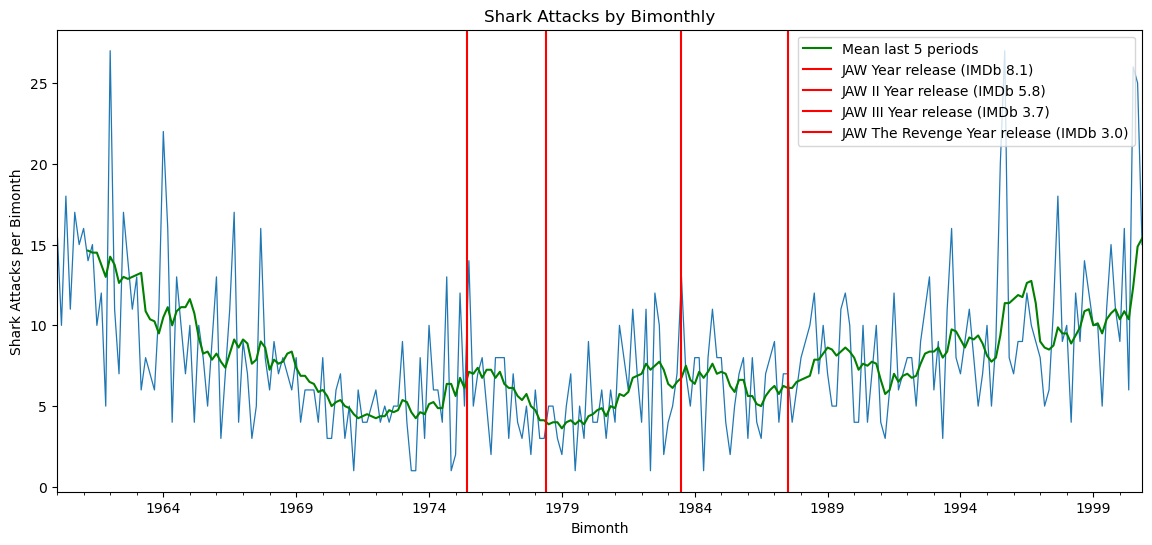

In [166]:
freq_plot_jaw("2M",1960,2000)

'Month'

# How does the ratio of Women/Men attacked by sharked change over time?

## Data Frame

In [19]:
gender_df = time_df[(time_df["Sex"] == "M") | (time_df["Sex"] == "F")].copy()
gender_df = gender_df.reset_index(drop=True)


In [69]:
gender_s = gender_df.groupby([pd.Grouper(key='Date', freq='M'), 'Sex']).size().unstack().fillna(0)
ratio_gender = gender_s['F'] / (gender_s['M'] + gender_s['F'])
#ratio_gender

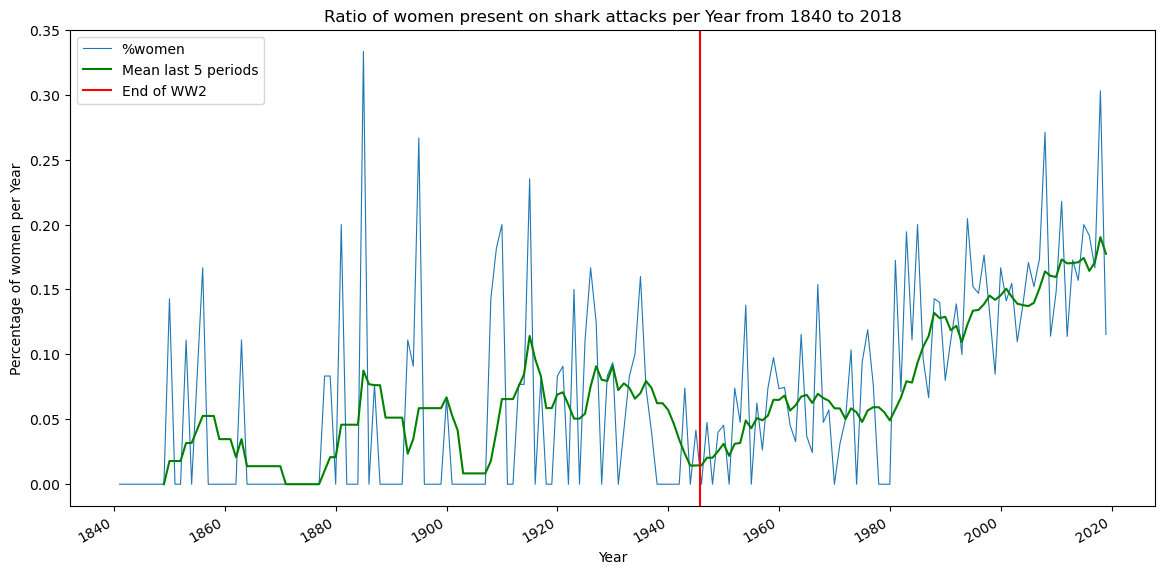

In [180]:
def ratio_gender_plot(x, start_year=1703, end_year=2018, df=gender_df):
    freq_dict = {"10Y":"10 year","5Y":"5 year","2Y":"2 years","Y": "Yearly", "6M":"Biannual","M": "Monthly", "W": "Weekly", "Q": "Quarterly", "D": "Daily", "2M":"Bimonthly"}
    period_dict = {"10Y":"10 years","5Y":"5 years","2Y":"2 years","Y": "Year", "6M":"Biannual","M": "Month", "W": "Week", "Q": "Quarter", "D": "Day", "2M":"Bimonth"}
    mean = {"10Y":4,"5Y":4,"2Y":4,"Y": 8, "6M":10, "M": 12, "W": 50, "Q": 20, "D": 60, "2M":30}
    gender_s = df.groupby([pd.Grouper(key='Date', freq=x), 'Sex']).size().unstack().fillna(0)
    serie = gender_s['F'] / (gender_s['M'] + gender_s['F'])
    serie = serie.loc[str(start_year):str(end_year)]
    mean = serie.rolling(8).mean()
    serie.plot(subplots=True, figsize=(14,7), linewidth=0.8, label="%women")
    mean.plot(label="Mean last 5 periods",color="green")
    plt.plot;
    plt.xlabel(f"{period_dict[x]}");
    plt.axvline("1945-09", label="End of WW2", color="red");
    plt.ylabel(f"Percentage of women per {period_dict[x]}");
    plt.legend()
    plt.title(f"Ratio of women present on shark attacks per {period_dict[x]} from {start_year} to {end_year}");
    
ratio_gender_plot("Y",1840)

# How has evolved the number of shark attacks by Country

In [76]:
~(time_df["Country"].isna())

0        True
1        True
2        True
3       False
4        True
        ...  
5763     True
5764     True
5765     True
5766     True
5767     True
Name: Country, Length: 5768, dtype: bool

In [81]:
country_df = time_df[~(time_df["Country"].isna())]
country_df = country_df.reset_index(drop=True)
for i in range(len(country_df)):
    country_df["Country"][i] = country_df["Country"][i].rstrip().lstrip()

In [170]:
top_10 = country_df.groupby(by="Country").count().sort_values("Date", ascending=False).head(5)
top_10_names = list(top_10.index)

251

In [150]:
top10_list = []
for x in country_df["Country"]:
    if x in top_10_names:
        top10_list.append(True)
    else:
        top10_list.append(False)

country_10 = country_df[top10_list]

(country_10.groupby([pd.Grouper(key='Date', freq="M"), "Country"]).size().unstack().fillna(0)).columns[0]

'AUSTRALIA'

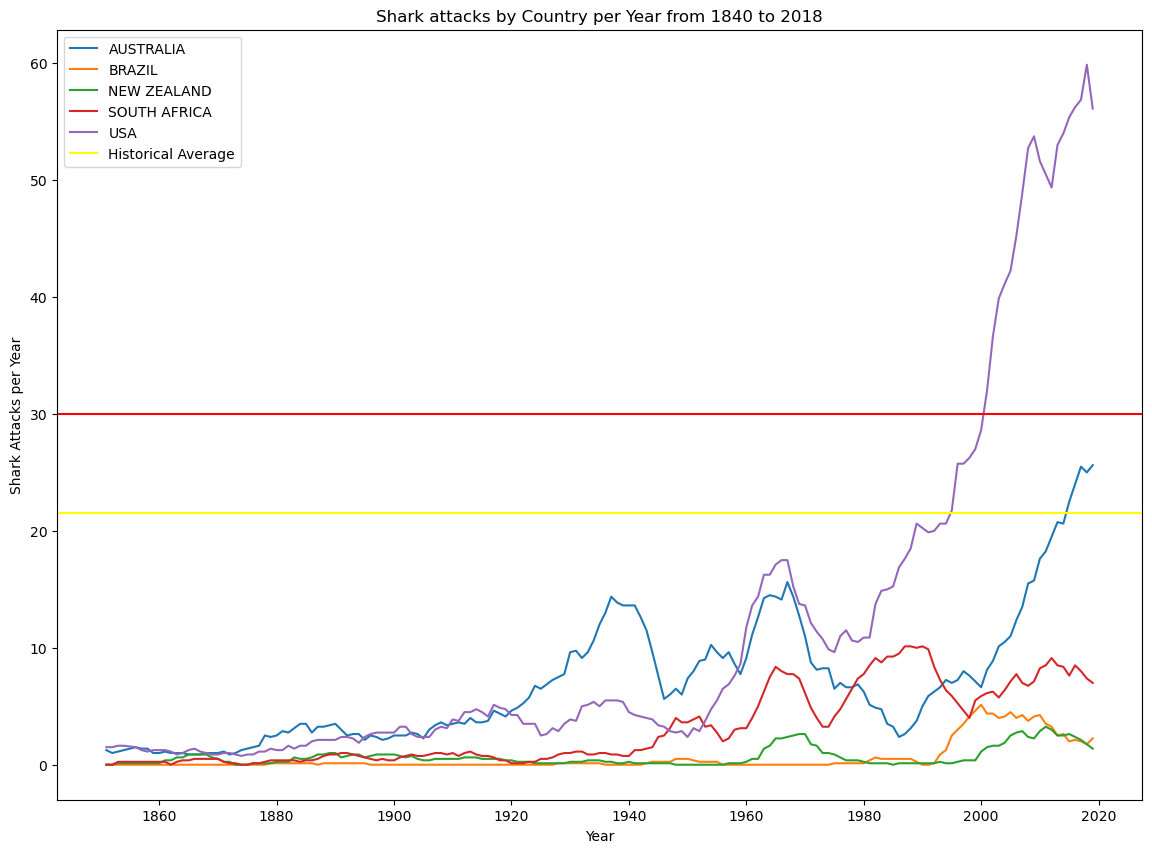

In [181]:
def country_plot(x, start_year=1703, end_year=2018, df=country_10):
    freq_dict = {"10Y":"10 year","5Y":"5 year","2Y":"2 years","Y": "Yearly", "M": "Monthly", "W": "Weekly", "Q": "Quarterly", "D": "Daily", "2M":"Bimonthly"}
    period_dict = {"10Y":"10 years","5Y":"5 years","2Y":"2 years","Y": "Year", "M": "Month", "W": "Week", "Q": "Quarter", "D": "Day", "2M":"Bimonth"}
    mean_dict = {"10Y":4,"5Y":4,"2Y":4,"Y": 8, "M": 12, "W": 50, "Q": 20, "D": 60, "2M":30}
    w = mean_dict[x]
    serie_df = df.groupby([pd.Grouper(key='Date', freq=x), "Country"]).size().unstack().fillna(0)
    serie_df = serie_df.loc[str(start_year):str(end_year)]
    
    fig, ax = plt.subplots(figsize=(14,10))
    ax.plot(serie_df.iloc[:,0].rolling(w).mean().index, serie_df.iloc[:,0].rolling(w).mean(), label=serie_df.columns[0])
    ax.plot(serie_df.iloc[:,1].rolling(w).mean().index, serie_df.iloc[:,1].rolling(w).mean(), label=serie_df.columns[1])
    ax.plot(serie_df.iloc[:,2].rolling(w).mean().index, serie_df.iloc[:,2].rolling(w).mean(), label=serie_df.columns[2])
    ax.plot(serie_df.iloc[:,3].rolling(w).mean().index, serie_df.iloc[:,3].rolling(w).mean(), label=serie_df.columns[3])
    ax.plot(serie_df.iloc[:,4].rolling(w).mean().index, serie_df.iloc[:,4].rolling(w).mean(), label=serie_df.columns[4])
    #ax.plot(serie_df.iloc[:,5].rolling(w).mean().index, serie_df.iloc[:,5].rolling(w).mean(), label=serie_df.columns[5])
    #ax.plot(serie_df.iloc[:,6].rolling(w).mean().index, serie_df.iloc[:,6].rolling(w).mean(), label=serie_df.columns[6])
    #ax.plot(serie_df.iloc[:,7].rolling(w).mean().index, serie_df.iloc[:,7].rolling(w).mean(), label=serie_df.columns[7])
    #ax.plot(serie_df.iloc[:,8].rolling(w).mean().index, serie_df.iloc[:,8].rolling(w).mean(), label=serie_df.columns[8])
    #ax.plot(serie_df.iloc[:,9].rolling(w).mean().index, serie_df.iloc[:,9].rolling(w).mean(), label=serie_df.columns[9])
    ax.legend()
    plt.axhline(30, color="red")
    plt.axhline(len(df)/len(set(df.Year)), color="yellow", label="Historical Average")
    #plt.axvline(len(euro_df)-ntest, label="P/R", color="red");
    plt.xlabel(f"{period_dict[x]}");
    plt.ylabel(f"Shark Attacks per {period_dict[x]}");
    plt.legend()
    plt.title(f"Shark attacks by Country per {period_dict[x]} from {start_year} to {end_year}");
    
    
country_plot("Y",1840)

In [ ]:
def country_plot(x, start_year=1703, end_year=2018, df=gender_df):
    freq_dict = {"10Y":"10 year","5Y":"5 year","2Y":"2 years","Y": "Yearly", "M": "Monthly", "W": "Weekly", "Q": "Quarterly", "D": "Daily", "2M":"Bimonthly"}
    period_dict = {"10Y":"10 years","5Y":"5 years","2Y":"2 years","Y": "Year", "M": "Month", "W": "Week", "Q": "Quarter", "D": "Day", "2M":"Bimonth"}
    mean = {"10Y":4,"5Y":4,"2Y":4,"Y": 8, "M": 12, "W": 50, "Q": 20, "D": 60, "2M":30}
    gender_s = df.groupby([pd.Grouper(key='Date', freq=x), 'Sex']).size().unstack().fillna(0)
    serie = gender_s['F'] / (gender_s['M'] + gender_s['F'])
    serie = serie.loc[str(start_year):str(end_year)]
    mean = serie.rolling(8).mean()
    serie.plot(subplots=True, figsize=(14,6), linewidth=0.8)
    mean.plot(label="Mean last 5 periods",color="green")
    plt.plot;
    plt.xlabel(f"{period_dict[x]}");
    plt.ylabel(f"Percentage of women per {period_dict[x]}");
    plt.legend()
    plt.title(f"Ratio of women present on shark attacks by {freq_dict[x]} from {start_year} to {end_year}");
    

ratio_gender_plot({"Y":1840,"D"

,Date,Case Number,Year,Type,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Month,Day
Country,,,,,,,,,,,,,,,,,,,,,
PHILIPPINES,1,1,1,1,1,0,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
TONGA,3,3,3,3,3,3,3,3,3,1,...,3,3,3,3,3,3,3,3,3,3
ADMIRALTY ISLANDS,1,1,1,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
AFRICA,1,1,1,1,0,0,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
ALGERIA,1,1,1,1,0,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIETNAM,12,12,12,11,8,10,9,11,12,5,...,4,12,12,12,12,12,12,12,12,12
WEST INDIES,2,2,2,2,0,0,2,2,2,0,...,0,2,2,2,2,2,2,2,2,2
WESTERN SAMOA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Merge/Fill Columns

## Fill empty years

In [ ]:
no_year_index = df[df.Year.isna()].index
for i in no_year_index:
    df["Year"][i] = df["Case Number"][i][:4]

## Location -> Area -> Country 
If area is null, copy the area value
If location is null, copy the area value

In [ ]:
for i in range(len(df)):
    if df["Area"].isnull()[i]:
        if df["Country"].isnull()[i]:
            pass
        else:
            df["Area"][i] = df["Country"].copy()[i]
            
for i in range(len(df)):
    if df["Location"].isnull()[i]:
        if df["Area"].isnull()[i]:
            pass
        else:
            df["Location"][i] = df["Area"].copy()[i]

In [ ]:
df.iloc[no_location_index,:]

In [303]:
set(df["Area"])

{' Kikori River mouth',
 ' La Libertad',
 ' Lau Province',
 ' Loyalty Islands',
 ' Manila Bay',
 ' New Jersey',
 ' North Carolina',
 ' Nusa Tenggara',
 ' Primorje-Gorski Kotar County',
 ' Split-Dalmatia Count,',
 ' Split-Dalmatia County',
 ' Upolu Island',
 '"Head of the Gulf"',
 '(Southwestern Pacific)',
 '04.05N-13.23W',
 '1,000 miles east of Hawaii',
 '1000 miles west of Hawaii',
 '10ºS, 142ºE',
 '12 miles off the north coast',
 '150 miles offshore',
 '165  miles from Bermuda',
 '180 miles southeast of Okinawa',
 '18S / 50E',
 '19S, 178?E',
 '2 to 3 miles off Taboguilla Island, Pacific Ocean',
 '200 nm southeast of Manila',
 '22ºN, 88ºE',
 '25 km off the coast of Iran & 483km from mouth of Persian Gulf',
 "250 miles southwest of O'ahu, Hawaii",
 '30 nm from Singapore',
 '300 miles east of Luzon',
 '300 miles east of Mauritius',
 '300 miles east of St. Thomas (Virgin Islands)',
 '300 miles from Antigua',
 '330 to 350 miles east of Wake Island',
 '33N, 68W',
 "35º39 : 165º8'",
 '40 mi

## Type

In [239]:
df[df["Type"].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
85,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,...,Injuries to hands and legs,N,Night,Unknown,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0
382,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,...,Injury to hand,NaN,NaN,Unknown,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,VIETNAM,Saigon,Wreck of a sampam,8 crew,M,...,FATAL,Y,NaN,Unknown,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,CEYLON,CEYLON,Diving,a pearl diver,M,...,FATAL,Y,NaN,Unknown,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0


## Activity
Fill with 1 or 0

In [157]:
parsa = []
date_parsable = []
for i in range(len(df)):
    try: 
        df["Date"] datetime.strptime(str(df["Date"][i]), "%d-%b-%Y")
        
        
    except:
        parsa.append(i)
        


1536

In [ ]:
# Make a boolean list with unvalid data

date_problem = []
for i in range(len(df)):
    if (bool(re.search(r"\d{2}-\w{3}-\d{4}", str(date_index[i]))) == False) & (len(str(date_index[i])) == 11):
        date_problem.append(False)
    else:
        date_problem.append(True)
        
df[clean_date]

In [13]:
a = []
for i in range(len(df)):
    try:
        date_index[i] = datetime.strptime(date_index[i], "%d-%b-%Y")
    except:
        a.append(i)

In [188]:
df[bolean_f]
df[df["Country"] == "CHILE"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
815,2012-03-01 00:00:00,2012-03-01 00:00:00,2012.0,Provoked,CHILE,Antofagasta Province,Antofagasta,Fishing (illegally),Paye León Salomón,M,...,N,NaN,NaN,"Soychile.cl, 3/1/2012",2012.03.01-Salomon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.03.01,2012.03.01,5488.0
2444,1994-03-23 00:00:00,1994-03-23 00:00:00,1994.0,Unprovoked,CHILE,NaN,300 miles east of Easter Island,Swimming alongside NOAA research vessel Discov...,Heather Boswell,F,...,N,11h58,"3.6 m [11'9""] white shark","H. Boswell, M. Levine & E. Ritter, GSAF",1994.03.23.b-Boswell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.03.23.b,1994.03.23.b,3859.0
2445,1994-03-23 00:00:00,1994-03-23 00:00:00,1994.0,Unprovoked,CHILE,NaN,300 miles East of Easter Island,Swimming alongside NOAA research vessel Discov...,Phil Buffington,M,...,N,11h51,"3.6 m [11'9""] white shark","H. Boswell, M. Levine, GSAF",1994.03.23.a-Buffington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.03.23.a,1994.03.23.a,3858.0
2703,1988-12-15 00:00:00,1988-12-15 00:00:00,1988.0,Unprovoked,CHILE,Valpariso Province,Valpariso,Skindiving,Juan Tapia-Avalos,M,...,Y,NaN,16' white shark,J. McCosker & A. Engana,1988.12.15-Avalos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.12.15,1988.12.15,3600.0
3037,1981-03-04 00:00:00,1981-03-04 00:00:00,1981.0,Unprovoked,CHILE,Coquimbo,"Bahia Totoralillo, 80 km north of Coquimbo",Free diving Spearfishing,Carlos Veraga M.,M,...,N,10h30,White shark,J. McCosker & A.C. Engana,1981.03.04-Vergara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1981.03.04,1981.03.04,3266.0
3078,1980-01-05 00:00:00,1980-01-05 00:00:00,1980.0,Unprovoked,CHILE,Los Vilos,"Punta Negra, Pichidangui",Hookah Diving,Jose Larenas-Miranda,M,...,Y,11h00,White shark,J. McCosker & A.C. Engana,1980.01.05-Miranda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1980.01.05,1980.01.05,3225.0
3737,1963-09-29 00:00:00,1963-09-29 00:00:00,1963.0,Unprovoked,CHILE,NaN,"El Panul, 12km south of Coquimbo",Spearfishing / free diving,Crisolog Urizar,M,...,Y,11h00,"White shark, 4 m [13'] rk",J. McCosker & A.C. Engana,1963.09.29-Urizar.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1963.09.29,1963.09.29,2566.0
4948,1934-02-22 00:00:00,1934-02-22 00:00:00,1934.0,Unprovoked,CHILE,Elqui Province,Coquimbo,Fell into the water,a soldier,M,...,Y,NaN,NaN,"Los Angeles Times, 2/23/1934, p.20",1934.02.22-Soldier-Chile.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.02.22,1934.02.22,1355.0


In [380]:

pdf_unextractable = ~(df["pdf"].apply(lambda x: bool(re.search(r"\d{4}.\d{2}.\d{2}", x))))
df[pdf_unextractable]
df[unparseble_dates]


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
14,2018.05.00,May 2018,2018.0,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,...,Shallow lacerations to finger PROVOKED INCIDENT,N,NaN,"Tawny nurse shark, 2m","Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0
37,2018.03.09.b,9-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,...,"No injury, said to have been charged by sharks...",N,15h30,3.5 m shark,"B. Myatt, GSAF",2018.03.09.b-Crossland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.b,2018.03.09.b,6266.0
38,2018.03.09.a,9-Mar-2018,2018.0,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,...,"Minor injury, ankle grazed",N,07h30,1.8 m shark,"B. Myatt, GSAF",2018.03.09.a-Weight.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.03.09.a,2018.03.09.a,6265.0
86,2017.09.14,Sep-2017,2017.0,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,...,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0
131,2017.06.05,2017.06.05,2017.0,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,male,M,...,Injuries to hand and wrist,N,NaN,Unknown,"Tahiti Infos, 6/6/2017",2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.05,2017.06.05,6172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Western Australia,Pearl diving,Ahmun,M,...,FATAL,Y,NaN,Unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,FATAL,Y,NaN,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,PANAMA,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,FATAL,Y,NaN,Unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [ ]:
df.Activity.isna().sum()

In [ ]:
set(df.Activity)

### Swimming
Lets select the cases where swimming was part of the activity

In [258]:
swim = []
for i in range(len(df)):
    if (bool(re.search("swim.+|Swim.+", str(df["Activity"][i])))):
        swim.append(i)
        
len(df.iloc[swim,7])

1123

### Diving

In [259]:
diving = []
for i in range(len(df)):
    if (bool(re.search("div(i|e)(.+)?", str(df["Activity"][i])))):
        diving.append(i)
        
len(df.iloc[diving,7])

355

In [ ]:
set(df["Activity"])


### Boat Fishing

In [260]:
fishing = []
for i in range(len(df)):
    if (bool(re.search("[^((S|s)pear|(W|w)ade)](F|f)ishing", str(df["Activity"][i])))):
        fishing.append(i)
        
len(df.iloc[fishing,7])

131

### In-Water Fishing (spearfishing, wade fishing)

In [298]:
spearfishing = []
for i in range(len(df)):
    if (bool(re.search("(S|s)pearfishing", str(df["Activity"][i])))):
        spearfishing.append(i)
        
set(df.iloc[spearfishing,7])

wadefishing = []
for i in range(len(df)):
    if (bool(re.search("(W|w)ad[ie]", str(df["Activity"][i])))):
        wadefishing.append(i)
        


np.array([spearfishing,wadefishing], dtype="object").flat

### Boat sunk or capsized, or wrecked

In [257]:
boat_sunk = []
for i in range(len(df)):
    if (bool(re.search("((S|s)([ua]nk)|(S|s)inking)|((C|c)apsiz)|(W|w)reck", str(df["Activity"][i])))):
        boat_sunk.append(i)
        
len(df.iloc[boat_sunk,7])

188

## Name

In [236]:
df[df["Name"].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,NEW CALEDONIA,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,...,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0
86,2017.09.14,Sep-2017,2017.0,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,...,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0
124,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,...,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0
154,2017.04.17.b,17-Apr-2017,2017.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,...,Minor bite to the foot,N,Afternoon,Unknown,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0
184,2017.01.13.b,13-Jan-2017,2017.0,Unprovoked,AUSTRALIA,Queensland,Clairview,Swimming,NaN,M,...,Injury to hand,N,13h30,Unknown,"Brisbane Times,1/13/2017",2017.01.13.b-Clairview.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.13.b,2017.01.13.b,6119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,ND-0150,Before 1934,0.0,Unprovoked,URUGUAY,Rocha,"Isla Chica, La Paloma",Swimming,NaN,NaN,...,Foot bitten,N,NaN,Unknown,"Di Candia, 2004",ND-0150-Uruguay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0150,ND-0150,118.0
6197,ND-0129,Before 2012,0.0,Unprovoked,SPAIN,Canary Islands,Tenerife,Skin diving,NaN,NaN,...,Injury required 16 stitches,N,NaN,Unknown,"C. Moore, GSAF",ND-0129-Tenerife.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0129,ND-0129,106.0
6218,ND.0096,No date,0.0,Unprovoked,REUNION,Grand'Anse,Petite-île,yachtsman in a zodiac,NaN,M,...,Survived,N,NaN,Unknown,G. Van Grevelynghe,ND-0096-Zodiac-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0096,ND.0096,85.0
6237,ND.0073,"No date, Before 1963",0.0,Unprovoked,SINGAPORE,SINGAPORE,"Keppel Harbor, 2 miles from Singapore city ce...",Swimming,NaN,NaN,...,Recovered,N,NaN,Unknown,"V.M. Coppleson (1958), p.266",ND-0073-KeppelHarbourSingapore.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0073,ND.0073,66.0


## Age

## Sex

In [238]:
df[df["Sex"].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,NEW CALEDONIA,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,...,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,LIBYA,Gars Garabulli,2 boats capsized,31 migrants,NaN,...,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0
86,2017.09.14,Sep-2017,2017.0,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,...,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0
124,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,...,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0
154,2017.04.17.b,17-Apr-2017,2017.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,...,Minor bite to the foot,N,Afternoon,Unknown,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,ND-0107,Before 2004,0.0,Boat,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",NaN,...,"No injury to occupants, shark bumped boat",N,NaN,Whale shark,South African Shark Attack File,ND-0107-Inhambane.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0107,ND-0107,91.0
6237,ND.0073,"No date, Before 1963",0.0,Unprovoked,SINGAPORE,SINGAPORE,"Keppel Harbor, 2 miles from Singapore city ce...",Swimming,NaN,NaN,...,Recovered,N,NaN,Unknown,"V.M. Coppleson (1958), p.266",ND-0073-KeppelHarbourSingapore.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0073,ND.0073,66.0
6259,ND.0044,1941-1945,0.0,Sea Disaster,NaN,NaN,NaN,A group of survivors on a raft for 17-days,C.,NaN,...,"FATAL, shark leapt into raft and bit the man w...",Y,Late afternoon,1.2 m [4'] shark,"G.A. Llano in Airmen Against the Sea, p.69",ND-0044-C.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0044,ND.0044,44.0
6278,ND.0024,Between 1918 & 1939,0.0,Unprovoked,REUNION,Saint-Denis,Barachois,Swimming,NaN,NaN,...,FATAL,Y,NaN,Unknown,G. Van Grevelynghe,ND-0024-Barachois-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0024,ND.0024,25.0


## Injury

## Fatal

## Time

## Species

In [ ]:
for i in range(len(df)):
    if df["Species"].isna()[i]:
        df["Species"][i] = "Unknown"


{'Nurse shark, 58", 34-lb ',
 "15' shark",
 "Leopard shark, 3' Triakis semifasciata, identified by J.W. DeWitt (1955)",
 'Thought to involve a mako shark, but possibly a sea lion',
 '"gray shark"',
 ">1.8 m [6'] shark",
 '2 m [6\'9"], 87.5-kg [193-lb]  shark',
 "Next morning a 3 m [10'] shark was caught that had Andrews' leg in its gut",
 "Tiger shark, 6'",
 "White shark, 5.2 m [17'], 2500-lb ",
 "5.5 m [18'] white shark, identified by witnesses & tooth marks",
 "Zambesi shark, 1.8 m [6'] ",
 "0.9 m to 1.2 m [3' to 4'] shark; Tooth fragment recovered from hand",
 'A 10-year-old 94-pound pregnant blacktip reef shark',
 "Tiger shark, 3 to 4 m [10' to 13'] ",
 "1.4 m [4.5'] shark",
 "5 m [16.5'] white shark",
 "Tiger shark, 8'",
 "Wobbegong shark, 4' ",
 'A large hammerhead shark',
 "Bronze whaler shark, 1.8 m [6'] ",
 'Thought to involve a mako or grey nurse shark',
 "Tiger shark, 5' ",
 'Thought to involve a cookie cutter shark',
 "Tiger shark, 2.4 m to 3.7 m [8' to 12'] ",
 'Thought to

## href formula and href columns

In [ ]:
# Here we try to make the column of href full of valid data, with links. If the value is invalid, meaning that it 
# doesn't have a http format, we use the other column with links. Once done, column(href) is removed
for i in range(len(df)):
    if str(df["href formula"][i]).startswith("http"):
        pass
    else:
        if str(df["href"][i]).startswith("http"):
            df["href formula"][i] = df["href"][i]
            
df.drop("href", axis=1, inplace=True)

In [ ]:
df.iloc[no_location_index,:]

# NaN in Columns

In [220]:
df.columns = [x.strip() for x in df.columns]
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [ ]:
df.isna().sum()


In [ ]:
print(df.columns)
df["Case Number"][187][:4]

### Cases with no Year

In [ ]:
set(df["Country"])

### Cases with no country, area or location


In [ ]:
no_country_index = df[df.Country.isna()].index
no_area_index = df[df.Area.isna()].index
no_location_index = df[df.Location.isna()].index

In [ ]:
df.loc[:,["Country","Area","Location"]][df.Country.isna()]

### Cases with no Activity

### Cases with no Name, sex or age

In [ ]:
no_name_index = df[df.Name.isna()].index
no_age_index = df[df.Age.isna()].index
no_sex_index = df[df.Sex.isna()].index

### Cases with no Injury, Fatal record

In [ ]:
no_injury_index = df[df.Injury.isna()].index
no_fatal_index = df[df["Fatal (Y/N)"].isna()].index

### Cases with no Time

In [ ]:
no_time_index = df[df.Time.isna()].index

### Cases with no Species

In [ ]:
# href -> elegir bien el link correcto
df[df["href"] != df["href formula"]][["href formula","href"]]

In [ ]:
df["href formula"][0].startswith("h")

In [ ]:
bool(re.search("^http",df["href"][0]))
bool(re.search("^http",df["href formula"][0]))

# for i in range(len(df["href"])):
#     if bool(re.search("^http",df["href formula"][i])):
#         pass
#     else:
#         print(["href formula"][i])

if bool(re.search("^http",df["href formula"][1])):
    print(3)

In [ ]:
df[df["Case Number"].duplicated() == True]